# Linear regression - Linear model

.. codeauthor:: Emile Roux emile.roux@univ-smb.fr

.. This notebook is ready for  [RISE](https://damianavila.github.io/RISE/) Slideshow

## Scope

* A finite number $N$ of data points are available: find the best line going trought this $N$ points.

https://en.wikipedia.org/wiki/Linear_regression

![reg](https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg)

In [1]:
#setup
%load_ext autoreload
%matplotlib notebook
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import ipywidgets as ipw

## Introduction with a simple tow points line equation

Let's annalyse how to determine the simple equation of a linear function ($y=ax+b$) kowing tow points of the line.

In [2]:
# the known points
y=np.array([-1,2])
x=np.array([.5,3])
x,y

(array([0.5, 3. ]), array([-1,  2]))

<IPython.core.display.Javascript object>


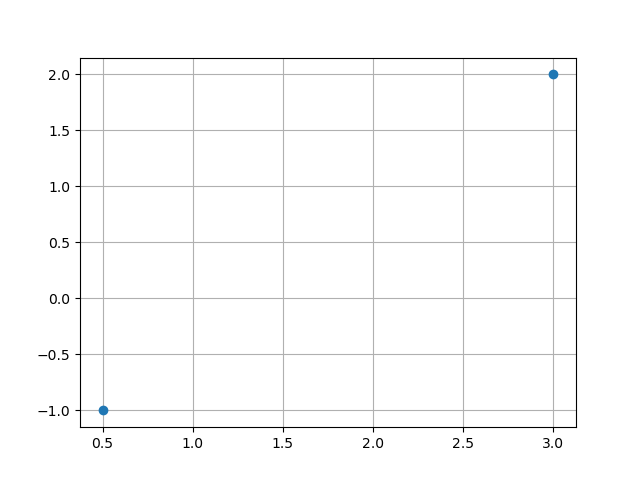

In [3]:
fig = plt.figure()
plt.plot(x,y,'o')
plt.grid()

To dertermine the $a$ and $b$ coefficents, we have to solve the following system:

$$
y_0=ax_0+b
$$
$$
y_1=ax_1+b
$$


Lets reorgenized a bit this system:

$$b + ax_0 = y_0$$

$$b + ax_1 = y_1$$

Its now easy to write it as a linear system:

$$
\begin{bmatrix} 
1 & x_0 \\
1 & x_1 
\end{bmatrix}
.
\begin{bmatrix} 
b \\
a
\end{bmatrix}
=
\begin{bmatrix} 
y_0 \\
y_1
\end{bmatrix}
$$

Therfore the $a$ and $b$ coefficents can be determine by inversing the linear system:

$$
\begin{bmatrix} 
b \\
a
\end{bmatrix}
=
\begin{bmatrix} 
1 & x_0 \\
1 & x_1 
\end{bmatrix}^{-1}
.
\begin{bmatrix} 
y_0 \\
y_1
\end{bmatrix}
$$

### Let's do this with python

In [4]:
# definition of the involved matrix :
X = np.array([[1, x[0]],[1,x[1]]])
print("X=",X)
Y = np.array([y[0],y[1]]).T
print("Y=",Y)

X= [[1.  0.5]
 [1.  3. ]]
Y= [-1  2]


In [5]:
# Inversion of the systeme
coef=np.dot(np.linalg.inv(X),Y)
a = coef[1]
b = coef[0]
print("a=",a,)
print("b=",b)

a= 1.2000000000000002
b= -1.6


In [6]:
# draw the obtained line
N = 10
xmin, xmax = 0., 4
xi = np.linspace(xmin, xmax, N)
yi = a * xi + b

<IPython.core.display.Javascript object>


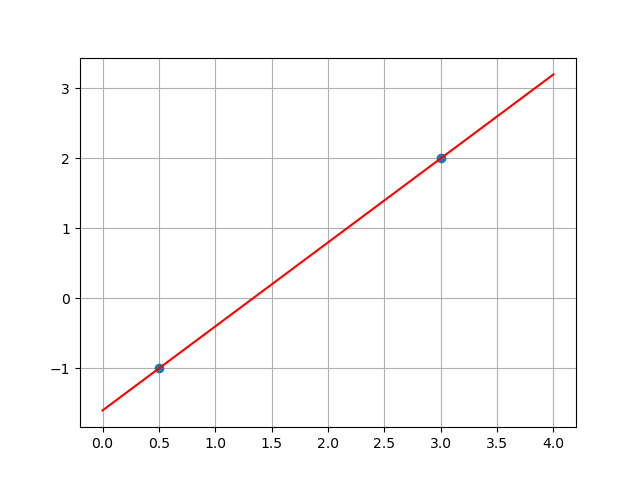

In [7]:
fig = plt.figure()
plt.plot(x,y,'o')
plt.plot(xi,yi,'r')
plt.grid()

## What append if we add a third point ?

In [8]:
# the known points
y=np.array([-1,2,0])
x=np.array([.5,3,1.5])
x,y

(array([0.5, 3. , 1.5]), array([-1,  2,  0]))

To dertermine the $a$ and $b$ coefficents, we have to solve the following system:

$$y_0=ax_0+b$$

$$y_1=ax_1+b$$

$$y_2=ax_2+b$$

This system is over deffined: we have 2 unkowns ($a$,$b$) and 3 equations. 

The goal is now to find the $a$ and $b$ coefficients (i.e. to find the linear equation) that fit the best the given data.

We can rewrite the equations in the form of the following linear system:

$$
\begin{bmatrix} 
1 & x_0 \\
1 & x_1 \\
1 & x_2
\end{bmatrix}
\begin{bmatrix} 
b \\
a
\end{bmatrix}
=
\begin{bmatrix} 
y_0 \\
y_1 \\
y_2
\end{bmatrix}
$$

The system can be express in a genral form:

$$X \beta=Y$$

The matrix $X$ is not square, and therfore not inversible. The methode presented above is no more apllicable.

The trick is to multiply the system by the transposed of $X$.

$$X^t X \beta= X^t Y$$

The therm $X^t X$ is now a square matrix. 



### Let's check this affirmation:

In [9]:
# Construcion of the X matrix
X = np.array([np.ones(x.size), x]).T
X

array([[1. , 0.5],
       [1. , 3. ],
       [1. , 1.5]])

In [10]:
# Computation of Xt X
np.dot(X.T,X)

array([[ 3. ,  5. ],
       [ 5. , 11.5]])

The obtained matrix is a square matrix and it can proved that this matrix is symmetric, and therfore always inversible.

From the previous equation:
$$X^t X \beta= X^t Y$$

The $\beta$ vector can be express by as :

$$\beta= \left( X^t X \right)^{-1} X^t Y$$

This operator is the least square estimator.

### Let's do this with python

In [11]:
# Construcion of the X matrix
X = np.array([np.ones(x.size), x]).T

# Construcion of the Y matrix
Y = y.T

print("X=",X)

print("Y=",Y)

X= [[1.  0.5]
 [1.  3. ]
 [1.  1.5]]
Y= [-1  2  0]


In [12]:
# Computation of the least square estimator
beta = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
print("beta=",beta)

print("The fitted linear function is:")
print("y=",beta[1],"x +",beta[0])

beta= [-1.68421053  1.21052632]
The fitted linear function is:
y= 1.210526315789474 x + -1.6842105263157898


### Now its time to plot the line

In [13]:
# draw the obtained line
N = 10
xmin, xmax = 0., 4
xi = np.linspace(xmin, xmax, N)
yi = beta[0] + beta[1] * xi

<IPython.core.display.Javascript object>


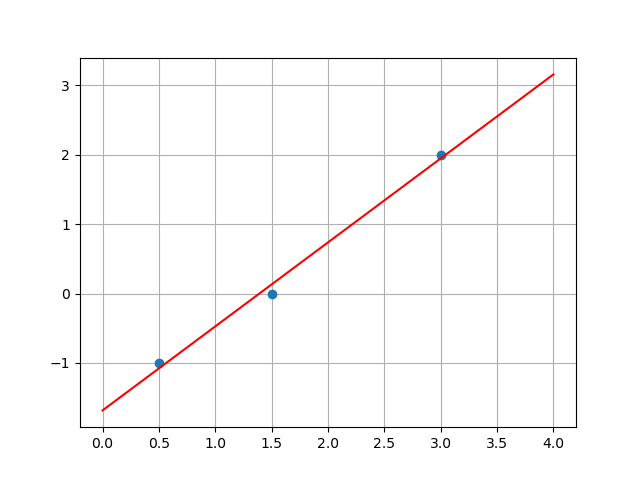

In [14]:
fig = plt.figure()
plt.plot(x,y,'o')
plt.plot(xi,yi,'r')
plt.grid()

## With a larger data set ?

### The data set : a synthetique data set with some noise

In [15]:
N = 100 
xmin, xmax = 0., 4
x = np.linspace(xmin, xmax, N) + np.random.rand(N)
y = (3.3 * x -2) + 2*np.random.randn(N)

<IPython.core.display.Javascript object>


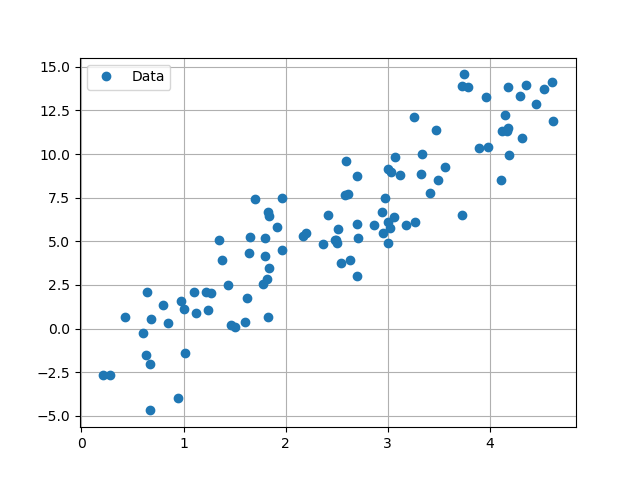

In [16]:
fig = plt.figure()
plt.plot(x,y,'o',label = "Data")
plt.legend()
plt.grid()

### Determination of the coefficent by regression

In [17]:
# Construcion of the X matrix
X = np.array([np.ones(x.size), x]).T

# Construcion of the Y matrix
Y = y.T

# Computation of the least square estimator
beta = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

print("The fitted linear function is:")
print("y=",beta[1],"x +",beta[0])

The fitted linear function is:
y= 3.5040953300898092 x + -2.7670001724748126


### Draw the obtain regression line

In [18]:
N = 10
xmin, xmax = 0., 5
xi = np.linspace(xmin, xmax, N)
yi = beta[0] + beta[1] * xi

<IPython.core.display.Javascript object>


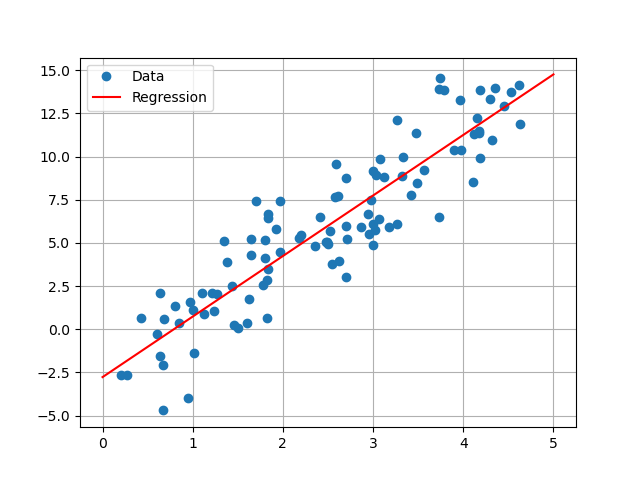

In [19]:
fig = plt.figure()
plt.plot(x,y,'o',label = "Data")
plt.plot(xi,yi,'r',label = "Regression")
plt.legend()
plt.grid()

## Does python  know how to do that in one line ?

### Of course yes ! 

### Using the polyfit function of numpy:

In [20]:
# compute the coefficient using the least square methode
beta=np.polyfit(x, y, 1)
print("beta=",beta)

# creat the associate 1d polynomila function
fit = np.poly1d(beta)

beta= [ 3.50409533 -2.76700017]


### Draw the obtaine regression line

In [21]:
N = 10
xmin, xmax = 0., 5
xi = np.linspace(xmin, xmax, N)
yi_numpy = fit(xi)

<IPython.core.display.Javascript object>


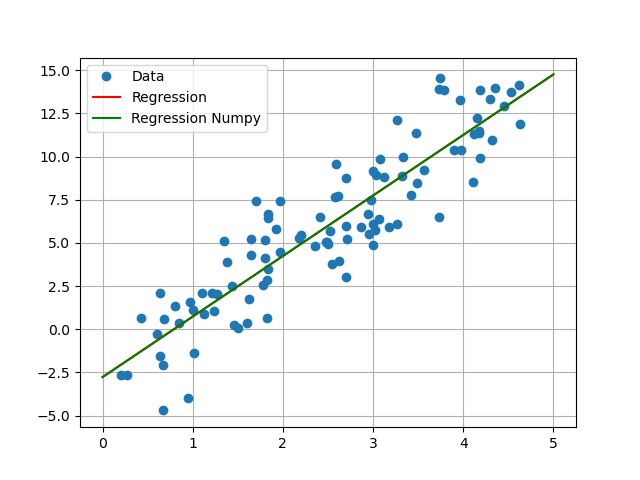

In [22]:
fig = plt.figure()
plt.plot(x,y,'o',label = "Data")
plt.plot(xi,yi,'r',label = "Regression")
plt.plot(xi,yi_numpy,'g',label = "Regression Numpy")
plt.legend()
plt.grid()

### Using numpy linalg function: 

For this methode de $X$ ans $Y$ matrix must be given by the user.

In [23]:
beta, r, rank, s = np.linalg.lstsq(X, Y,rcond=None)
print("beta=",beta)

beta= [-2.76700017  3.50409533]


Lucky us, all methodes give the same results !

### What is the effect of noise on the resulting regression ?

<IPython.core.display.Javascript object>


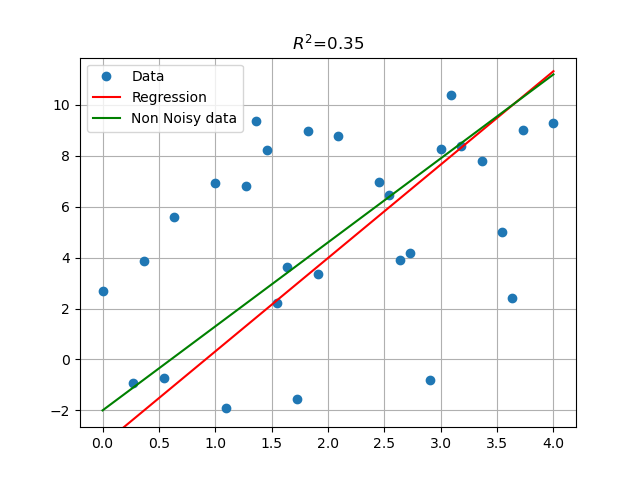

interactive(children=(IntSlider(value=45, description='N', min=5, step=10), FloatSlider(value=5.0, description…

In [24]:
N = 100
xmin, xmax = 0., 4

def get_data(N,sigma):
    x = np.linspace(xmin, xmax, N) 
    y = (3.3 * x -2) + sigma*np.random.randn(N)
    return x,y

def compute_reg(x,y):
    beta,residuals, rank, singular_values, rcond =np.polyfit(x, y, 1, full=True)
    fit= np.poly1d(beta)
    SStot = ((y - y.mean())**2).sum()
    SSres = residuals[0]
    R2 = 1 - SSres/SStot
    return beta,fit([xmin,xmax]),R2

x,y = get_data(100, 0.)
beta,fity, R2 = compute_reg(x,y)
fig = plt.figure()
points_plot,=plt.plot(x,y,'o',label = "Data")
line,=plt.plot([xmin,xmax],fity,'-r',label = "Regression")
plt.plot([xmin,xmax],fity,'-g',label = "Non Noisy data")
plt.grid()
plt.legend()

@ipw.interact(N=(5,100,10),sigma=(0.0,10.0,.1))
def update(N,sigma):
    x,y = get_data(N,sigma)
    beta,fity, R2 = compute_reg(x,y)
    points_plot.set_xdata(x)
    points_plot.set_ydata(y)
    line.set_ydata(fity)
    plt.title('$R^2$={:0.2f}'.format(R2))
    
